Description.

This dataset provides a comprehensive overview of various factors(20) affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.

1.Hours_Studied: Number of hours spent studying per week.

2.Attendance:	Percentage of classes attended.

3.Parental_Involvement:	Level of parental involvement in the student's education (Low, Medium, High).

4.Access_to_Resources: Availability of educational resources (Low, Medium, High).

5.Extracurricular_Activities:	Participation in extracurricular activities (Yes, No).

6.Sleep_Hours: Average number of hours of sleep per night.

7.Previous_Scores	:Scores from previous exams.

8.Motivation_Level: Student's level of motivation (Low, Medium, High).

9.Internet_Access: Availability of internet access (Yes, No).

10.Tutoring_Sessions: Number of tutoring sessions attended per month.

11.Family_Income: Family income level (Low, Medium, High).

13.Teacher_Quality: Quality of the teachers (Low, Medium, High).

14.School_Type: Type of school attended (Public, Private).

15.Peer_Influence: Influence of peers on academic performance (Positive, Neutral, Negative).

16.Physical_Activity: Average number of hours of physical activity per week.

17.Learning_Disabilities: Presence of learning disabilities (Yes, No).

18.Parental_Education_Level: Highest education level of parents (High School, College, Postgraduate).

19.Distance_from_Home: Distance from home to school (Near, Moderate, Far).

20.Gender: Gender of the student (Male, Female).

21.Exam_Score	Final exam score.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head(25)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [3]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

There are 20 features, 13 of which are categorical and 7 numerical features.
Our Target Feature is the last feature, Exam_score.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

EDA: Data Quality.(Missing values, Duplicates, inconsistencies/outliers)

In [5]:
#Cheking for Missing Values.
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Three Features have missing values, All categorical , Teacher_Quality,Parental_Education_Level,Distance_from_Home 

In [6]:
df['Parental_Education_Level'].unique()
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])


In [7]:
df['Distance_from_Home'].unique()
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])

In [8]:
df['Teacher_Quality'].unique()
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])

Checking and dropping of Duplicated values if any


In [9]:
duplicated = df.duplicated().sum()
#df.drop_duplicated(inplace =True)
df = df.drop_duplicates()

Dealing with outliers. Numerical values

In [10]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


Seems there are no major outliers. Comparing min and max values with the 50%.

FEATURE  ENGINEERING

<Figure size 400x200 with 0 Axes>

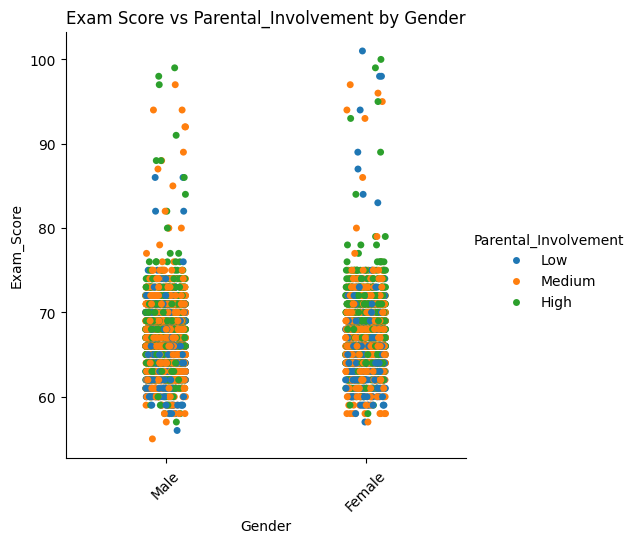

<Figure size 400x200 with 0 Axes>

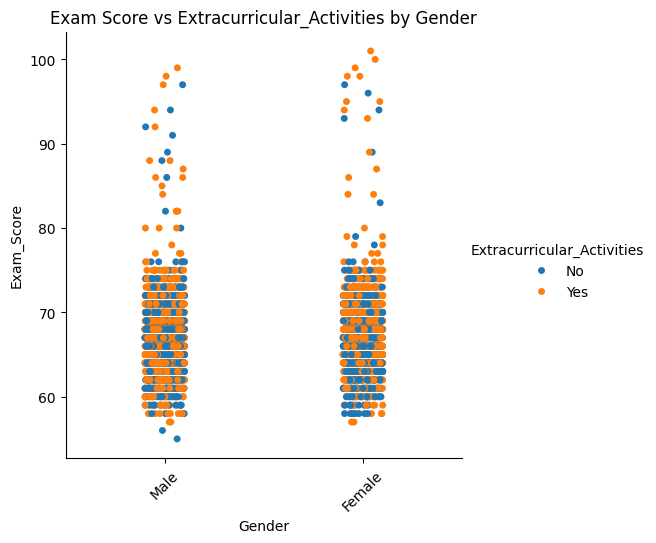

<Figure size 400x200 with 0 Axes>

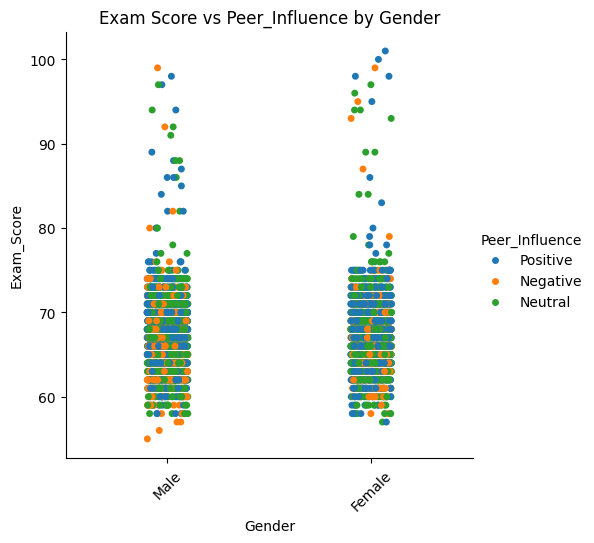

<Figure size 400x200 with 0 Axes>

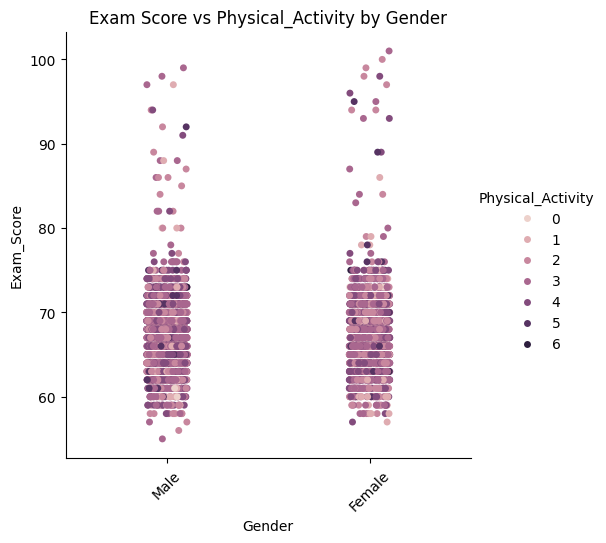

<Figure size 400x200 with 0 Axes>

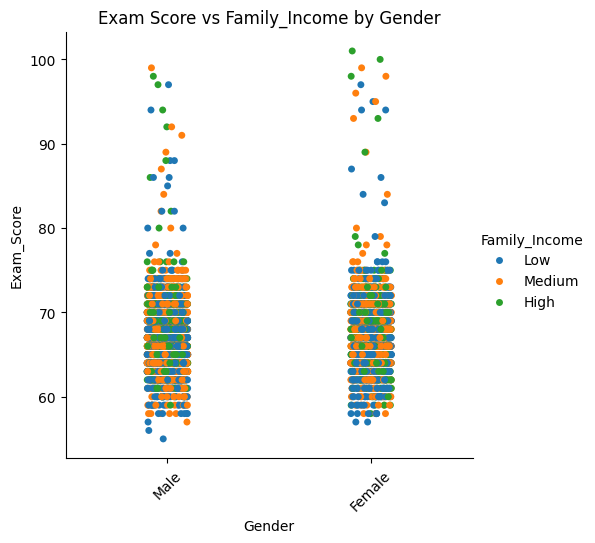

In [11]:
gender_cat = ['Parental_Involvement', 'Extracurricular_Activities', 'Peer_Influence','Physical_Activity','Family_Income']

for i in gender_cat:
    plt.figure(figsize = ( 4 , 2 ))
    sns.catplot (  x = 'Gender', y = 'Exam_Score', hue = i,  data = df)
    plt.title (f'Exam Score vs {i} by Gender')
    plt.xticks(rotation  =  45)
    plt.show()

In [12]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

<Figure size 400x200 with 0 Axes>

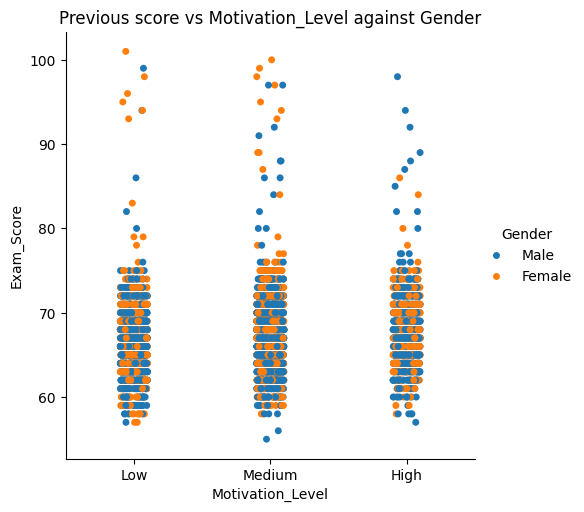

<Figure size 400x200 with 0 Axes>

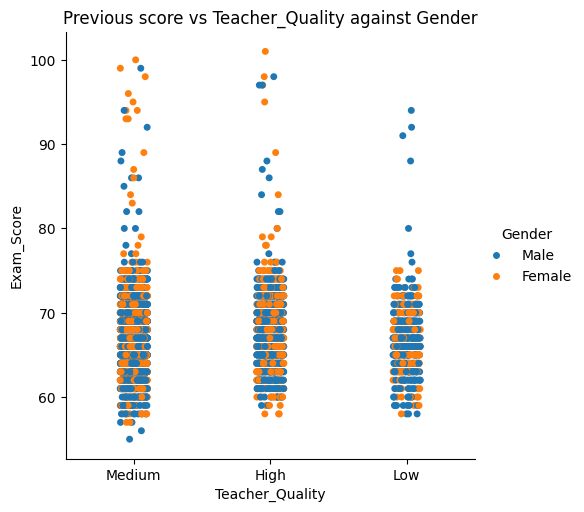

<Figure size 400x200 with 0 Axes>

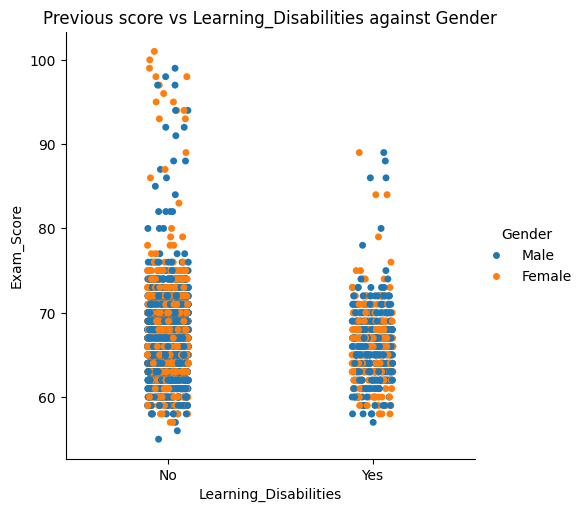

In [13]:
previous_score_cat = ['Motivation_Level','Teacher_Quality','Learning_Disabilities']

for i in previous_score_cat:
    plt.figure(figsize = (4, 2))
    sns.catplot(data = df, x = i, y = 'Exam_Score', hue = 'Gender')
    plt.title(f'Previous score vs {i} against Gender')
    plt.show()


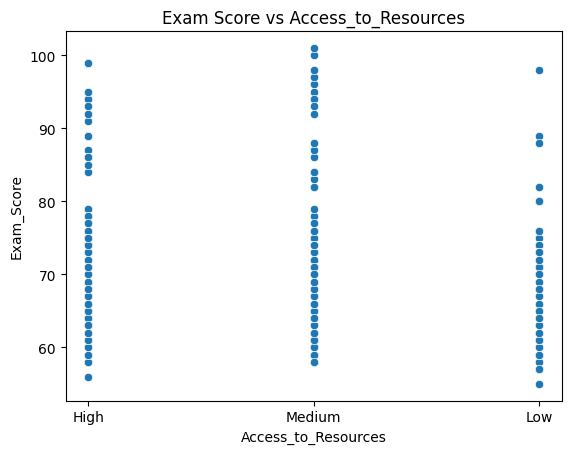

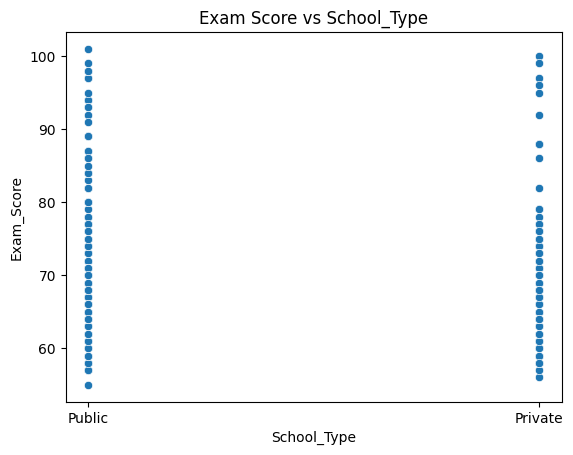

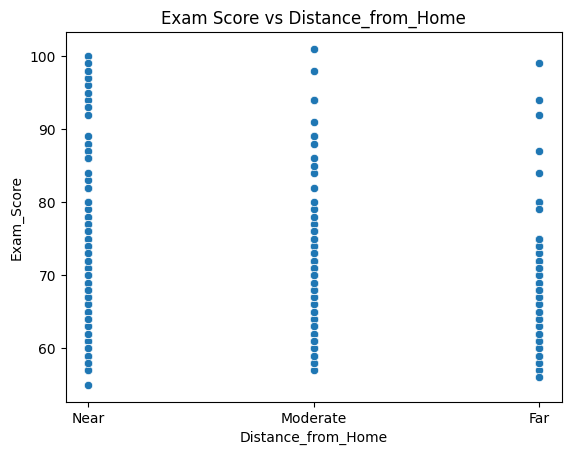

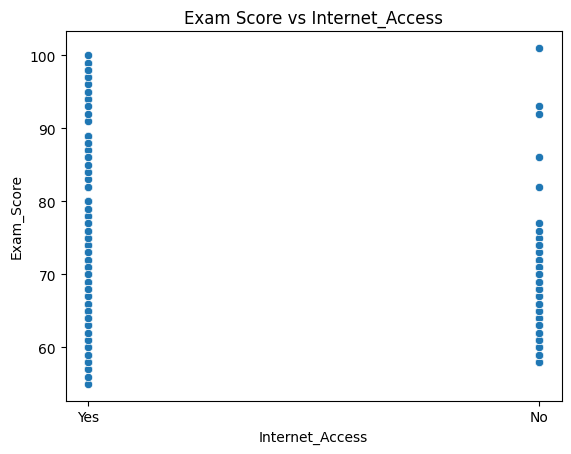

In [14]:
independent_cats = ['Access_to_Resources','School_Type','Distance_from_Home','Internet_Access']
for  i  in  independent_cats:

    plt.Figure(figsize= (4,2))
    sns.scatterplot(data = df, x = i, y = 'Exam_Score')
    plt.title(f'Exam Score vs {i}')
    plt.show()

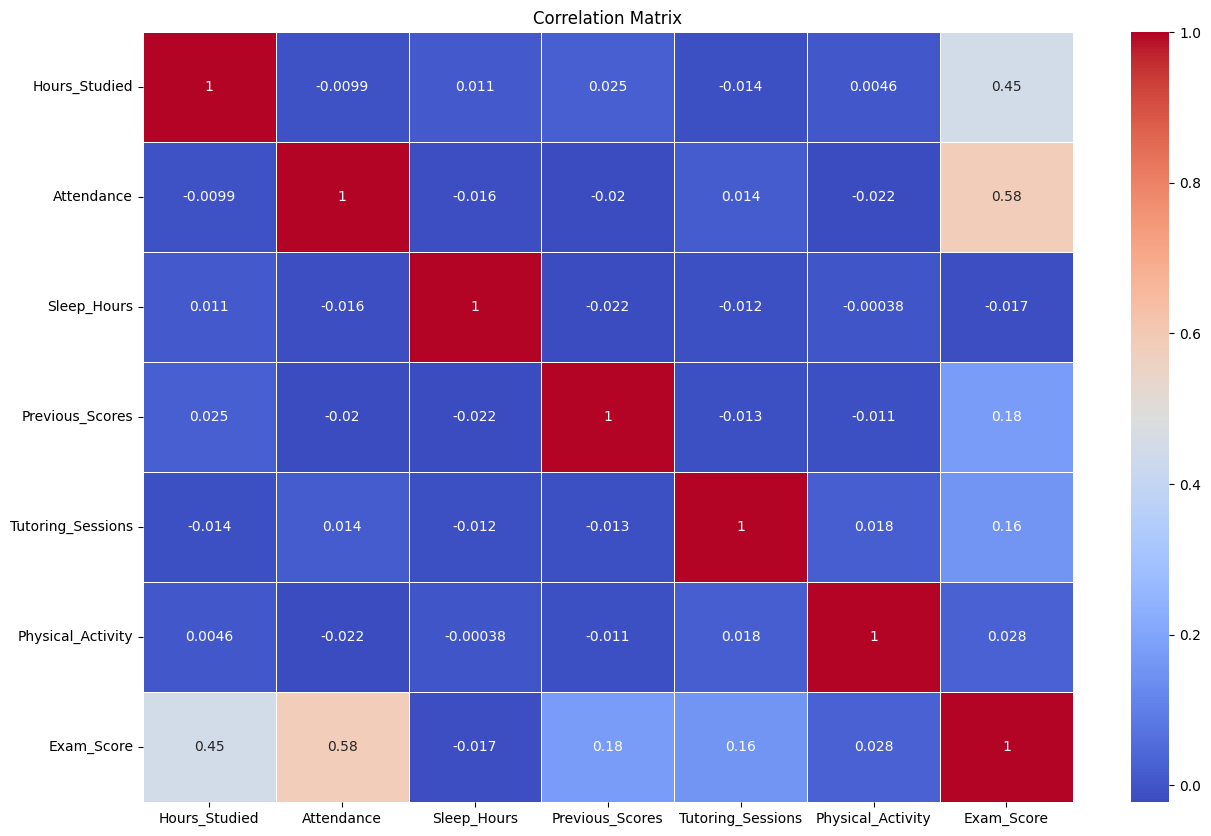

In [15]:
df_numeric = df.select_dtypes(include =[float, int])
corr_matrix = df_numeric.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths= 0.5)
plt.title('Correlation Matrix')
plt.show()